In [2]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math


# 1)misure 0°

In [3]:
df = pd.read_csv('Gi.csv')
df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,0.153229,0.172383,9.825804,9.828510
1,0.021573,0.143652,0.153229,9.801862,9.804112
2,0.037472,0.143652,0.153229,9.825804,9.828048
3,0.050413,0.143652,0.167594,9.821015,9.823496
4,0.061822,0.153229,0.143652,9.825804,9.828048


In [4]:
df.count()

Time (s)                         7891
Acceleration x (m/s^2)           7891
Acceleration y (m/s^2)           7891
Acceleration z (m/s^2)           7891
Absolute acceleration (m/s^2)    7891
dtype: int64

<Figure size 432x288 with 0 Axes>

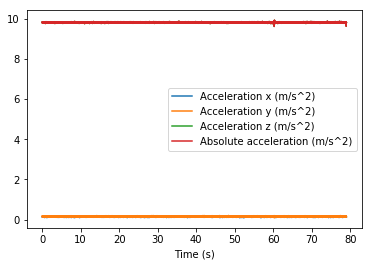

In [5]:
plt.figure()
df.plot(x='Time (s)')

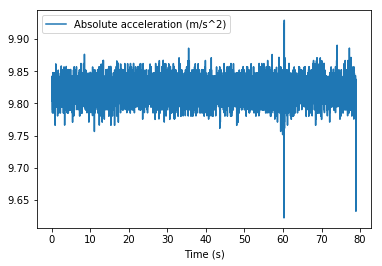

In [6]:
df.plot(x='Time (s)',y='Absolute acceleration (m/s^2)')

In [7]:
df.mean()

Time (s)                         39.488374
Acceleration x (m/s^2)            0.141224
Acceleration y (m/s^2)            0.161843
Acceleration z (m/s^2)            9.817573
Absolute acceleration (m/s^2)     9.819941
dtype: float64

In [8]:
a=1
b=1000
df[a:b].std()

Time (s)                         2.885334
Acceleration x (m/s^2)           0.013530
Acceleration y (m/s^2)           0.013463
Acceleration z (m/s^2)           0.016158
Absolute acceleration (m/s^2)    0.016167
dtype: float64

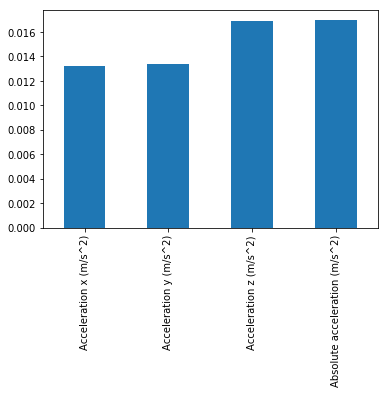

In [9]:
df[['Acceleration x (m/s^2)',
    'Acceleration y (m/s^2)',
    'Acceleration z (m/s^2)',
    'Absolute acceleration (m/s^2)']].std().plot(kind='bar')

mu=9.81994097647155, sigma=0.01694889085186864, n=7891


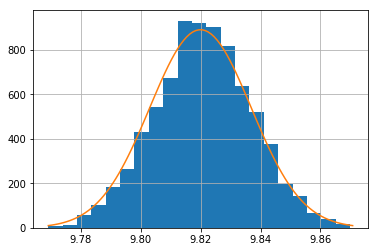

In [10]:
col4='Absolute acceleration (m/s^2)'
mu=df[col4].mean()
sigma=df[col4].std()
n=df[col4].count()
print('mu={0}, sigma={1}, n={2}'.format(mu,sigma,n))
x=np.linspace(mu - 3*sigma, mu + 3*sigma,100)

binw=0.0048
norm=n*binw
f_gauss = norm*stats.norm.pdf(x,mu,sigma)
df[col4].hist(bins=np.arange(mu - 3*sigma, mu + 3*sigma,binw))
plt.plot(x,f_gauss)

In [11]:
dati= df.T.to_numpy()

In [12]:
dati

array([[0.00000000e+00, 2.15730000e-02, 3.74720000e-02, ...,
        7.89734710e+01, 7.89832630e+01, 7.89935060e+01],
       [1.53228909e-01, 1.43652096e-01, 1.43652096e-01, ...,
        1.34075299e-01, 1.53228909e-01, 1.38863698e-01],
       [1.72382519e-01, 1.53228909e-01, 1.53228909e-01, ...,
        1.62805721e-01, 1.81959331e-01, 1.38863698e-01],
       [9.82580376e+00, 9.80186176e+00, 9.82580376e+00, ...,
        9.82580376e+00, 9.79707336e+00, 9.80186176e+00],
       [9.82851028e+00, 9.80411184e+00, 9.82804836e+00, ...,
        9.82806702e+00, 9.79996096e+00, 9.80382886e+00]])

In [13]:
dati.shape

(5, 7891)

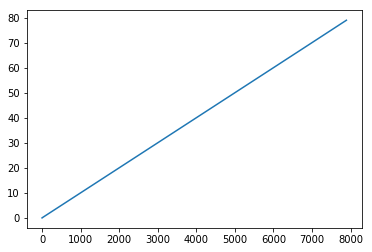

In [14]:
plt.plot(dati[0])

In [15]:
az=dati[3]
az

array([9.82580376, 9.80186176, 9.82580376, ..., 9.82580376, 9.79707336,
       9.80186176])

In [16]:
len(az[:-91])

7800

In [17]:
az100=np.asarray(np.array_split(az[:-91],100))
az100.shape

(100, 78)

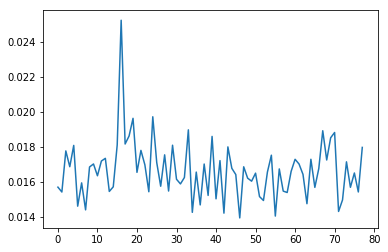

In [18]:
#deviazione standars per l'array riga 0
stdz=np.std(az100,axis=0)
plt.plot(stdz,'-')

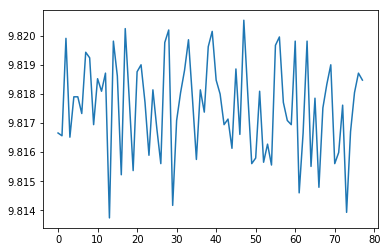

In [19]:
muz=np.mean(az100,axis=0)
plt.plot(muz,'-')

In [20]:
test=[az[0:10],
     az[11:31],
     az[32:72],
     az[73:153],
     az[154:394],
     az[395:1000],
     az[1001:2001],
     az[2002:4002],
    az[4003:40000],]

In [21]:
test=np.asarray(test)

In [22]:
test.shape

(9,)

In [23]:
length_checker=np.vectorize(len)

In [24]:
n=length_checker(test)
print(n)

[  10   20   40   80  240  605 1000 2000 3888]


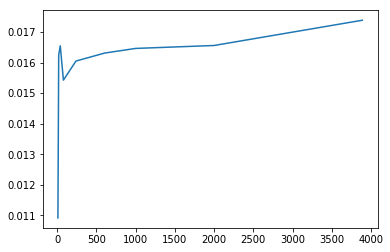

In [25]:
vstd=np.vectorize(np.std)
stdt=vstd(test)
stdtMean=stdt/np.sqrt(n)
plt.plot(n,stdt)


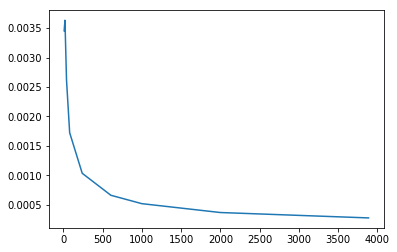

In [26]:
plt.plot(n,stdtMean)

# 2)misure 30°

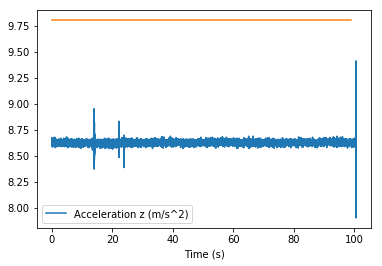

In [38]:
df = pd.read_csv('G.30°.csv')
df.plot(x='Time (s)',y='Acceleration z (m/s^2)')
y=0*x+9.804
plt.plot(y,'-')